# TP 1 : Reminder on Markov Chains – Stochastic gradient descent

Student : Simon Queric

In [781]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Exercice 3 : Stochastic Gradient Learning in Neural Networks

We implement the Stochastic Gradient Descent to minimize a Mean Squared Error : 

$$R_n(w) = \frac{1}{n}\sum_{i=1}^n{(y_i - w^Tx_i)^2} = \mathbb{E}_{\mu_n}\left[(Y - w^TX)^2\right]$$

where $\mu_n = \displaystyle\frac{1}{n}\sum_{i=1}^n{\delta_{(x_i, y_i)}}$ is the empirical distribution of $(X, Y)$. 

We have : 

$$F(x, y, w) = (y - w^Tx)^2$$ 

 so that

$$\nabla_wF(x, y, w) = -2(y - w^Tx)x$$

I chose a gradient descent step $\displaystyle \gamma_k = \frac{\gamma}{\sqrt{k}}$.

In [783]:
## QUESTION 1 ##

np.random.seed(0)

def SGD(x, y, gamma=.01, N_ITER=100):
    loss = []
    n = len(x)
    d = len(x[0])
    sample = list(range(n))
    w0 = np.random.multivariate_normal(np.zeros(d), np.eye(d))
    for i in range(1, N_ITER):
        k = np.random.choice(sample)
        w0 += 2*gamma*(y[k] - np.dot(w0, x[k]))*x[k]/np.sqrt(i)
        w0/=np.linalg.norm(w0)
        loss.append(np.mean((y - w0.dot(x.T))**2)) 
    return w0, loss

def predict(x, w) :
    return 2*(np.dot(x, w)>0) - 1

def accuracy(y_predict, y_true) :
    return np.sum(y_predict==y_true)/len(y_predict)

In [784]:
## QUESTION 2 ##
np.random.seed(0)

# normal vector of an hyperplane
w = np.random.multivariate_normal(np.zeros(2), np.eye(2))
w/= np.linalg.norm(w)

# sample generation
n_sample = 1000
sigma = 2
cov = sigma* np.eye(2)

x = np.random.multivariate_normal(np.zeros(2), cov, n_sample)
y = 2*(w.dot(x.T)>0) - 1

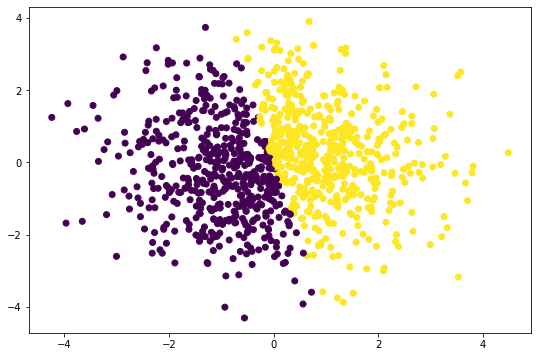

In [785]:
fig = plt.figure(figsize=(9, 6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

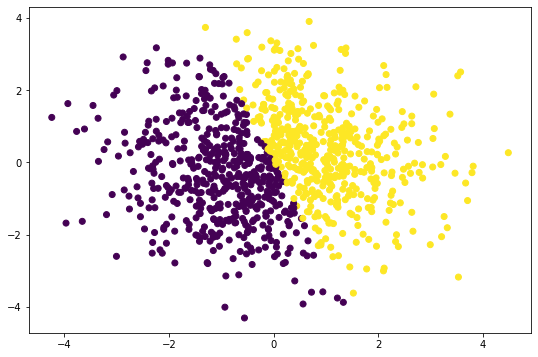

In [786]:
## QUESTION 3 ##

w_, loss = SGD(x, y, gamma=0.1, N_ITER=2000) #, gamma=.01, N=2000)

fig = plt.figure(figsize=(9, 6))
plt.scatter(x[:,0], x[:,1], c=predict(x,w_))
plt.show()

In [787]:
print("Distance between estimation and true w : {:.3f} ".format(np.linalg.norm(w_ - w)))

Distance between estimation and true w : 0.115 


Let's plot the losses for several algorithm runs : 

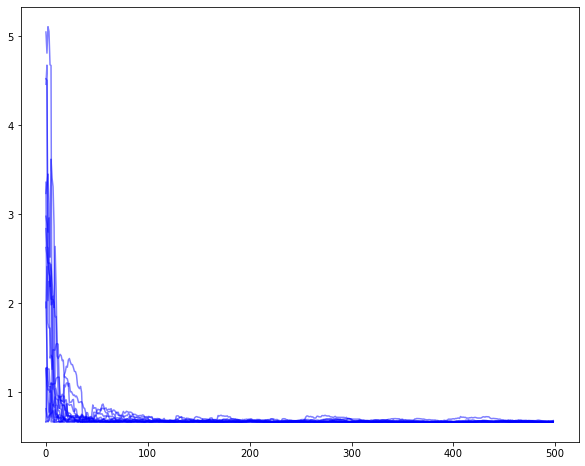

In [788]:
losses = []
for i in range(15) :
    wstar, loss = SGD(x, y, gamma=0.1, N_ITER=500)
    if i>0 and loss[-1] < losses[-1][-1] :
        w_=wstar
    losses.append(loss)

fig=plt.figure(figsize=(10,8))
for i in range(15) :
    plt.plot(losses[i], alpha=.5, color="blue")

In [789]:
y_predict = predict(x, w_)
print("Accuracy on synthetic data : {:.3f}".format(accuracy(y_predict, y)))

Accuracy on synthetic data : 0.986


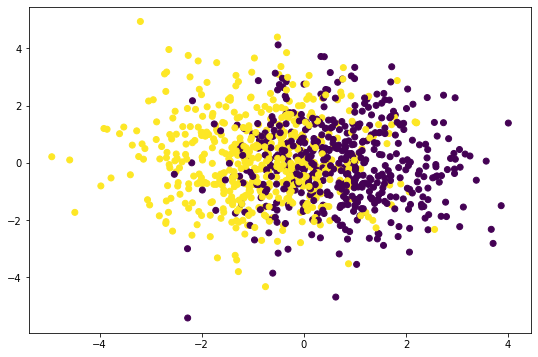

Accuracy on synthetic data : 0.747
Distance between estimation and true w : 0.061 


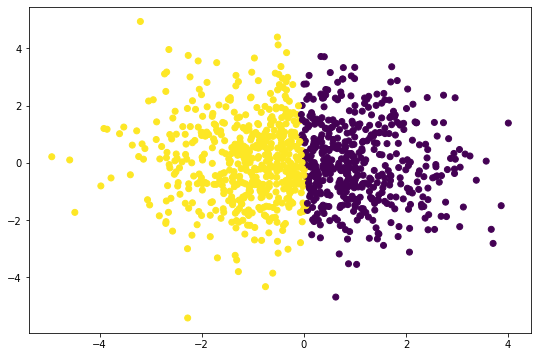

In [790]:
## QUESTION 4 ##

# normal vector of an hyperplane
w = np.random.multivariate_normal(np.zeros(2), np.eye(2))
w/= np.linalg.norm(w)

# sample generation
x = np.random.multivariate_normal(np.zeros(2), np.eye(2), n_sample)
y = 2*(w.dot(x.T)>0) - 1
x+= np.random.multivariate_normal(np.zeros(2), np.eye(2), n_sample)

fig = plt.figure(figsize=(9, 6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

w_, loss = SGD(x, y, gamma=0.1, N_ITER=2000) #, gamma=.01, N=2000)

y_predict = predict(x, w_)
print("Accuracy on synthetic data : {:.3f}".format(accuracy(y_predict, y)))
print("Distance between estimation and true w : {:.3f} ".format(np.linalg.norm(w_ - w)))

fig = plt.figure(figsize=(9, 6))
plt.scatter(x[:,0], x[:,1], c=predict(x,w_))
plt.show()

We can see that the accuracy the gaussian additive noise decrease the accuracy (from 0.95 to 0.75). Of course if the variance of this noise increase, the accuracy goes to zero. 

However, $\bar{w}$ and its estimation $w^*$ seems to be quite close even with the gaussian additive noise. It shows that this estimation is quite robust.

In [791]:
## QUESTION 5 ##

table = pd.read_csv("breast-cancer-wisconsin.data", delimiter=",", index_col=0, header=None).replace("?",
np.nan).dropna().values

X = np.array(table[:,1:]).astype(float)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = table[:,0]
y = -1*(y=='M') + 1*(y=='B')
y = np.array(y).astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)

In [793]:
w_, loss = SGD(X_train, y_train, gamma=0.1, N_ITER=3000)

print("Accuracy on the test set : {:.3f}".format(accuracy(predict(X_test, w_), y_test)))

Accuracy on the test set : 0.957


We obtain a good accuracy on test set, between 0.85 and 0.98. 